# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [1]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
stopwords = stopwords.words('english')

import time
from sklearn.model_selection import GridSearchCV

## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [2]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('./data/20-newsgroups.csv')
print('Shape:', df.shape)

Shape: (11314, 4)


In [3]:
# 3. Inspect / remove nulls and duplicates
print('Nulls:')
print(df.isnull().sum(), end='\n\n')

print('Duplicates:')
print(df.duplicated().sum())

Nulls:
id                0
message           0
topic             0
topic_category    0
dtype: int64

Duplicates:
0


In [4]:
# 4. Find class balances, print out how many of each topic_category there are.
df['topic_category'].value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
sci.med                     594
rec.autos                   594
comp.windows.x              593
sci.space                   593
sci.electronics             591
comp.os.ms-windows.misc     591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words. 


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [5]:
# 1. Make a function that makes all text lowercase.
def to_lowercase(a_string):
    return a_string.lower()

test_string = 'This is A SENTENCE with LOTS OF CAPS.'
print('Before lowercase:', test_string)
print('After lowercase: ', to_lowercase(test_string))


Before lowercase: This is A SENTENCE with LOTS OF CAPS.
After lowercase:  this is a sentence with lots of caps.


In [6]:
# 2. Make a function that removes all punctuation. 
def remove_punctuation(a_string):
    return re.sub(r'[^\w\s]','', a_string)

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
print('Before punctuation removal:', test_string)
print('After punctuation removal: ', remove_punctuation(test_string))


Before punctuation removal: This is a sentence! 50 With lots of punctuation??? & other #things.
After punctuation removal:  This is a sentence 50 With lots of punctuation  other things


In [7]:
# 3. Make a function that removes all stopwords.
def remove_stopwords(a_string):
    words = word_tokenize(a_string)
    valid_words = []
    for word in words:
        if word not in stopwords:
            valid_words.append(word)
    
    return ' '.join(valid_words)

test_string = 'This is a sentence! With some different stopwords i have added in here.'
print('Before removing stopwords:', test_string)
print('After removing stopwords:', remove_stopwords(test_string))


Before removing stopwords: This is a sentence! With some different stopwords i have added in here.
After removing stopwords: This sentence ! With different stopwords added .


In [8]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 
def stem_words(a_string):
    porter = PorterStemmer()
    words = word_tokenize(a_string)
    valid_words = [porter.stem(word) for word in words]
    return ' '.join(valid_words)

test_string = 'I played and started playing with players and we all love to play with plays'
print('Before Stem:', test_string)
print('After Stem:', stem_words(test_string))

Before Stem: I played and started playing with players and we all love to play with plays
After Stem: I play and start play with player and we all love to play with play


In [9]:
# Lemma
def lemm_words(a_string):
#     lemmatizer = WordNetLemmatizer()
    words = word_tokenize(a_string)
    pass    

test_string = 'I played and started playing with players and we all love to play with plays'

In [10]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.
def text_pipeline(a_string):
    a_string = to_lowercase(a_string)
    a_string = remove_punctuation(a_string)
    a_string = remove_stopwords(a_string)
    a_string = stem_words(a_string)
    return a_string

test_string = 'I played and started playing with players and we all love to play with plays'

text_pipeline(test_string)

'play start play player love play play'

In [11]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 

df['message_clean'] = df['message'].apply([text_pipeline])
df.head()

,id,message,topic,topic_category,message_clean
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos,lerxstwamumdedu where thing subject car nntppo...
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,guykuocarsonuwashingtonedu guy kuo subject si ...
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,twillisececnpurdueedu thoma e willi subject pb...
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics,jgreenamb joe green subject weitek p9000 organ...
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,jcmheadcfaharvardedu jonathan mcdowel subject ...


# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [12]:
# 1. Define your `X` and `y` data. 
X = df['message_clean']
y = df['topic_category']

In [13]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
vectorizer = TfidfVectorizer()


In [14]:
# 3. Fit your vectorizer using your X data
vectorizer.fit(X)


TfidfVectorizer()

In [15]:
# 4. Transform your X data using your fitted vectorizer. 
X = vectorizer.transform(X)


In [16]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?
print(X.shape, type(X))


(11314, 119708) <class 'scipy.sparse.csr.csr_matrix'>


# Split your data into Training and Testing data. 

In [17]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [18]:
# 1. Initalize an empty model. 
model = MultinomialNB(alpha=.5)


In [19]:
# Fit our model with our training data.
model.fit(X_train, y_train)


MultinomialNB(alpha=0.5)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [20]:
# 1. Make new predictions of our testing data. 
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)

In [21]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.874945


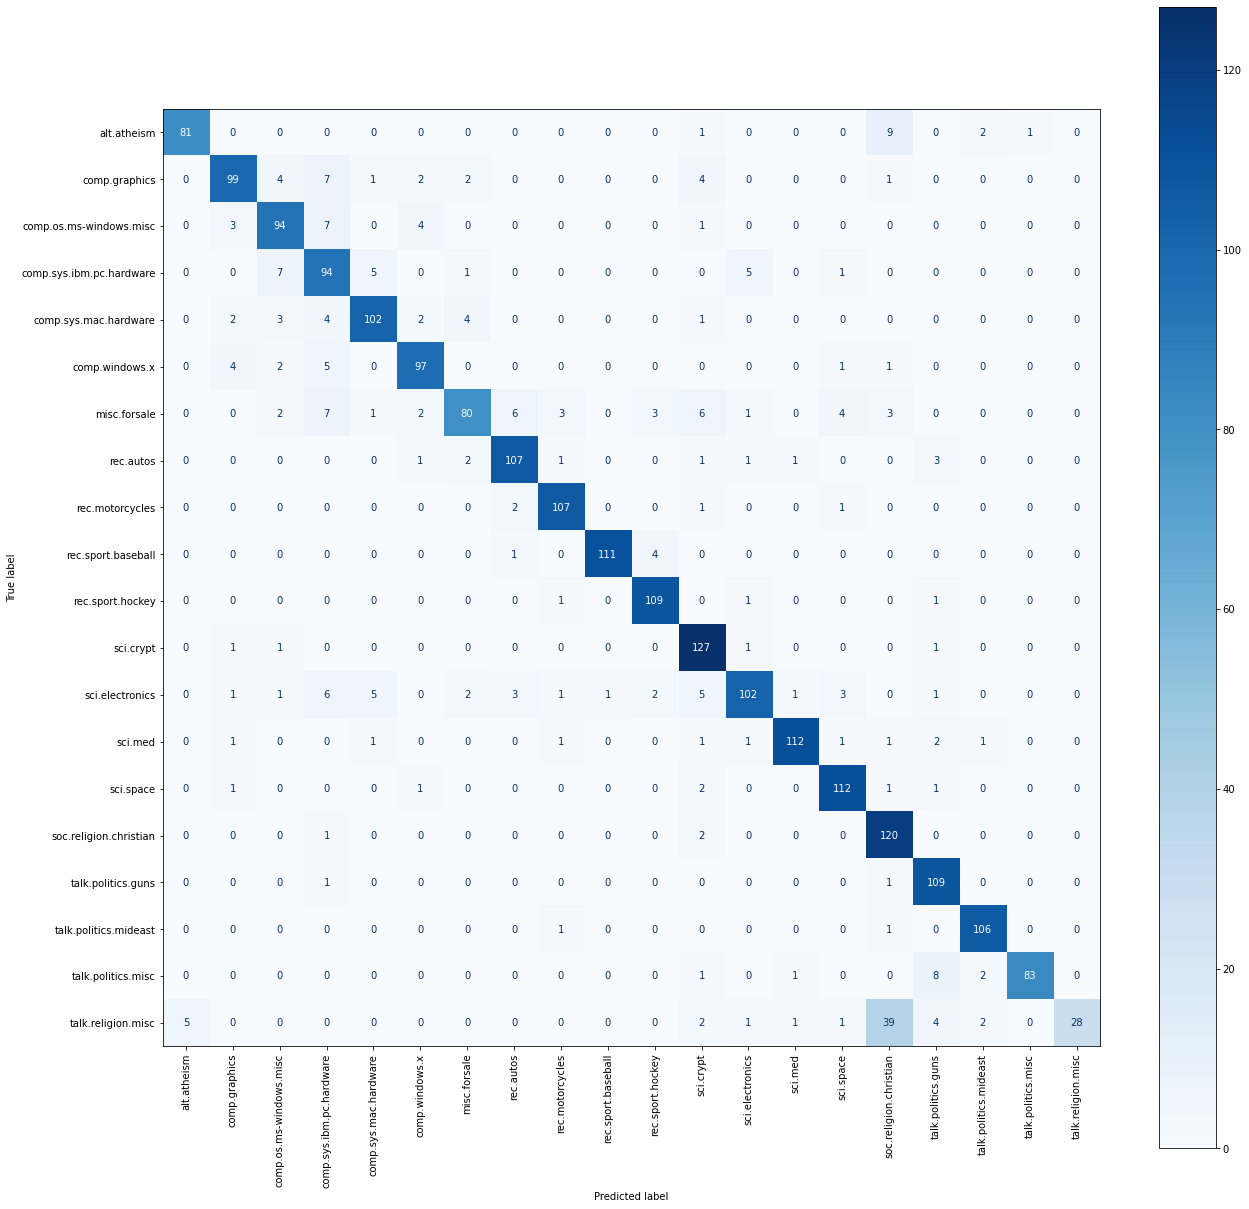

In [22]:
# 3. Plot the confusion matrix of our predictions
fig, ax = plt.subplots(figsize=(21, 21))

disp = plot_confusion_matrix(model, X_test, y_test, display_labels=model.classes_, cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp


In [23]:
# 4. Using `classification_report` print the evaluation results for all the classes. 
print(classification_report(y_test, y_pred, target_names=model.classes_))


                          precision    recall  f1-score   support

             alt.atheism       0.94      0.86      0.90        94
           comp.graphics       0.88      0.82      0.85       120
 comp.os.ms-windows.misc       0.82      0.86      0.84       109
comp.sys.ibm.pc.hardware       0.71      0.83      0.77       113
   comp.sys.mac.hardware       0.89      0.86      0.88       118
          comp.windows.x       0.89      0.88      0.89       110
            misc.forsale       0.88      0.68      0.77       118
               rec.autos       0.90      0.91      0.91       117
         rec.motorcycles       0.93      0.96      0.95       111
      rec.sport.baseball       0.99      0.96      0.97       116
        rec.sport.hockey       0.92      0.97      0.95       112
               sci.crypt       0.82      0.97      0.89       131
         sci.electronics       0.90      0.76      0.83       134
                 sci.med       0.97      0.92      0.94       122
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [24]:
my_sentence = 'The second amendment states, A well regulated Militia, being necessary to the security of a free State, the right of the people to keep and bear Arms, shall not be infringed.'

# 1. Apply the text pipeline to your sentence
new_sentence = text_pipeline(my_sentence)
# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
new_sentence_vector = vectorizer.transform([new_sentence])
# 3. Use the model to predict your new `X`. 
model.predict(new_sentence_vector)
# 4. Print the prediction
pp = model.predict_proba(new_sentence_vector)

for c, p in zip(model.classes_, pp.round(3)[0]):
    print(c, p)

alt.atheism 0.006
comp.graphics 0.002
comp.os.ms-windows.misc 0.002
comp.sys.ibm.pc.hardware 0.002
comp.sys.mac.hardware 0.002
comp.windows.x 0.002
misc.forsale 0.002
rec.autos 0.004
rec.motorcycles 0.008
rec.sport.baseball 0.005
rec.sport.hockey 0.004
sci.crypt 0.245
sci.electronics 0.004
sci.med 0.005
sci.space 0.005
soc.religion.christian 0.01
talk.politics.guns 0.621
talk.politics.mideast 0.032
talk.politics.misc 0.033
talk.religion.misc 0.004


### GridSearchCV

In [25]:
print('[INFO]...Using Grid Search for finding the best alpha...')
model = MultinomialNB()

params = {
    'alpha' : [0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75, 1]
}

print('[INFO]...Searching...')
grid_search_cv = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy')
grid_search_cv.fit(X_train, y_train)

print('[INFO]...Best Model Produced:', grid_search_cv.best_params_)
model = grid_search_cv.best_estimator_

print('[INFO]...Model\'s accuracy: %f' % model.score(X_test, y_test))


[INFO]...Using Grid Search for finding the best alpha...
[INFO]...Searching...
[INFO]...Best Model Produced: {'alpha': 0.05}
[INFO]...Model's accuracy: 0.902342


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [26]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')

df.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [27]:
print('Shape:', df.shape)
print('# of duplicates:', df.duplicated().sum())
print('N/A\'s:')
print(df.isna().sum())
print('Null\'s:')
print(df.isnull().sum())

Shape: (86460, 3)
# of duplicates: 57
N/A's:
Party     0
Handle    0
Tweet     0
dtype: int64
Null's:
Party     0
Handle    0
Tweet     0
dtype: int64


In [28]:
df['Party'].value_counts()

Republican    44392
Democrat      42068
Name: Party, dtype: int64

In [29]:
print('Before dropping duplicates:', df.shape)
df.drop_duplicates(inplace=True)
print('After dropping duplicates :', df.shape)

Before dropping duplicates: (86460, 3)
After dropping duplicates : (86403, 3)


In [30]:
df = pd.get_dummies(df, columns=['Party'], drop_first=True,)

In [31]:
df.head()

,Handle,Tweet,Party_Republican
0,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",0
1,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,0
2,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,0
3,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,0
4,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,0


In [32]:
print('[INFO]...Create new clean_tweet column for vectorizing tweet')
start = time.time()
df['clean_tweet'] = df['Tweet'].apply([text_pipeline])
end = time.time()
print('[INFO]...Finished creating clean_tweet column in {}'.format(str(round(end-start, 3)) + 's'))

[INFO]...Create new clean_tweet column for vectorizing tweet
[INFO]...Finished creating clean_tweet column in 55.794s


In [33]:
# Splitting df into X and y
X = df['clean_tweet']
y = df['Party_Republican']

In [34]:
# created an tfid vectorizer
vectorizer = TfidfVectorizer()

vectorizer.fit(X)

X = vectorizer.transform(X)

print('[INFO]...# of columns for X:', X.shape[1])
print('[INFO]...Type of X:', type(X))

[INFO]...# of columns for X: 121124
[INFO]...Type of X: <class 'scipy.sparse.csr.csr_matrix'>


In [35]:
print('[INFO]...Splitting data...')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print('[INFO]...Complete')

[INFO]...Splitting data...
[INFO]...Complete


In [36]:
print('[INFO]...Building model...')
model = MultinomialNB()

params = {
    'alpha': [1.0e-10, 0.05, 0.1, 0.15 ,0.25, 0.5, 0.75, 1]
         }

print('[INFO]...Starting GridSearchCV...')
grid_search_cv = GridSearchCV(model, param_grid=params, scoring='f1')
start = time.time()
grid_search_cv.fit(X_train, y_train)
end = time.time()
print('[INFO]...Fit GridSearchCV in: {}'.format(round(end-start), 2) + 's')

print('[INFO]...Best Params from GridSearchCV:', grid_search_cv.best_params_)

[INFO]...Building model...
[INFO]...Starting GridSearchCV...
[INFO]...Fit GridSearchCV in: 1s
[INFO]...Best Params from GridSearchCV: {'alpha': 0.25}


In [37]:
model = grid_search_cv.best_estimator_

print('[INFO]...Evaluating best model...')
y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)
print('[INFO]...Model\'s Accuracy: %f' % accuracy)

f1_score = metrics.f1_score(y_test, y_pred)
print('[INFO]...Model\'s F1 Score: %f' % f1_score)


[INFO]...Evaluating best model...
[INFO]...Model's Accuracy: 0.808287
[INFO]...Model's F1 Score: 0.816525


In [38]:
# my_sentence = 'Hey guys! Did you guys see AOC play Among Us on twitter.tv and got 300k+ viewers! Make sure to go check her out and support her the democratic party'
my_sentence = 'The democratic party is lying to you! Don\'t trust them. Trust us instead'

my_sentence = text_pipeline(my_sentence)
my_sentence_vec = vectorizer.transform([my_sentence])
model.predict(my_sentence_vec)

pp = model.predict_proba(my_sentence_vec)

for p1, p2 in pp:
    print('Democrat:', p1)
    print('Republic:', p2)



Democrat: 0.6916625677743655
Republic: 0.30833743222563453
